Using the dataframe from Random Forest and SVM classifiers to understand the data better. 

In [34]:
%matplotlib inline
 
import matplotlib.pyplot as plt
import numpy as np
import os
import pprint
pp = pprint.PrettyPrinter(indent=4)

In [39]:
import joblib
from skimage.io import imread
from skimage.transform import resize

data = 'archive/Garbage classification/Garbage classification'

def resize_all(src, pklname, include, width=150, height=None):
    
    if height == None: height = width
    data = dict()
    data['description'] = f'resized ({width}x{height})garbage images in rgb'
    data['label'] = []
    data['filename'] = []
    data['data'] = []   
    
    pklname = f"{pklname}_{width}x{height}px.pkl"
    
    for subdir in os.listdir(src):
        if subdir in include:
            print(subdir)
            current_path = os.path.join(src, subdir)
 
            for file in os.listdir(current_path):
                if file[-3:] in {'jpg', 'png'}:
                    im = imread(os.path.join(current_path, file))
                    im = resize(im, (width, height)) #[:,:,::-1]
                    data['label'].append(subdir)
                    data['filename'].append(file)
                    data['data'].append(im)
 
        joblib.dump(data, pklname)


data_path = 'archive/Garbage classification/Garbage classification'
os.listdir(data_path)

['paper', '.DS_Store', 'metal', 'cardboard', 'trash', 'glass', 'plastic']

In [40]:
width = 80
height = 80
base_name = 'garbage_classes'

include = {'glass', 'paper', 'cardboard', 
           'metal', 'plastic', 'trash'}
 
resize_all(src=data_path, pklname=base_name,include=include, width=80)


paper
metal
cardboard
trash
glass
plastic


In [41]:
from collections import Counter
 
data = joblib.load(f'{base_name}_{width}x{width}px.pkl')
 
print('number of samples: ', len(data['data']))
print('keys: ', list(data.keys()))
print('description: ', data['description'])
print('image shape: ', data['data'][0].shape)
print('labels:', np.unique(data['label']))
 
Counter(data['label'])

number of samples:  2527
keys:  ['description', 'label', 'filename', 'data']
description:  resized (80x80)garbage images in rgb
image shape:  (80, 80, 3)
labels: ['cardboard' 'glass' 'metal' 'paper' 'plastic' 'trash']


Counter({'paper': 594,
         'metal': 410,
         'cardboard': 403,
         'trash': 137,
         'glass': 501,
         'plastic': 482})

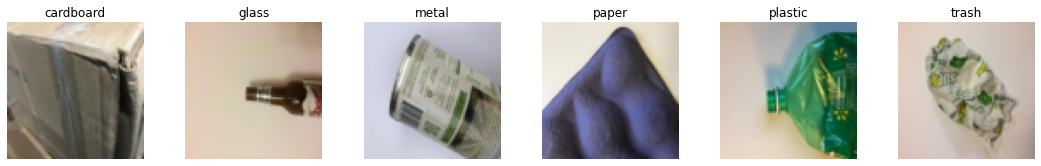

In [42]:
labels = np.unique(data['label'])
 
fig, axes = plt.subplots(1, len(labels))
fig.set_size_inches(15,4)
fig.tight_layout()

for ax, label in zip(axes, labels):
    idx = data['label'].index(label)
     
    ax.imshow(data['data'][idx])
    ax.axis('off')
    ax.set_title(label)

In [43]:
X = np.array(data['data'])
y = np.array(data['label'])

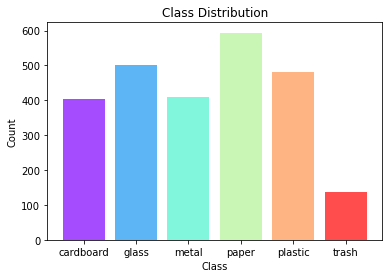

In [44]:
def plot_histogram(y, title='Class Distribution', ylabel_text='count'):
    # Calculate counts per class and sort to ensure order
    unique, counts = np.unique(y, return_counts=True)
    sorted_index = np.argsort(unique)
    unique = unique[sorted_index]
    counts = counts[sorted_index]
    
    colors = plt.cm.rainbow(np.linspace(0, 1, len(unique)))
    
    # Plot histogram
    plt.bar(unique, counts, align='center', alpha=.7, color=colors)
    plt.xlabel('Class')
    plt.ylabel(ylabel_text)
    plt.title(title)
    plt.show()

y_data = y  
plot_histogram(y_data, title='Class Distribution', ylabel_text='Count')

In [45]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    shuffle=True,
    random_state=42,
)

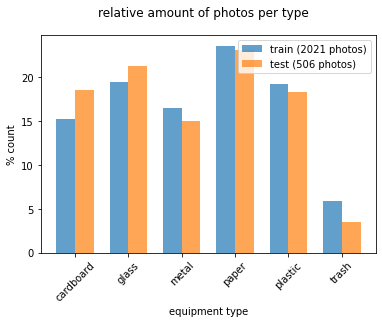

In [46]:
def plot_bar(y, loc='left', relative=True):
    width = 0.35
    if loc == 'left':
        n = -0.5
    elif loc == 'right':
        n = 0.5
     
    # calculate counts per type and sort, to ensure their order
    unique, counts = np.unique(y, return_counts=True)
    sorted_index = np.argsort(unique)
    unique = unique[sorted_index]
     
    if relative:
        # plot as a percentage
        counts = 100*counts[sorted_index]/len(y)
        ylabel_text = '% count'
    else:
        # plot counts
        counts = counts[sorted_index]
        ylabel_text = 'count'
         
    xtemp = np.arange(len(unique))
     
    plt.bar(xtemp + n*width, counts, align='center', alpha=.7, width=width)
    plt.xticks(xtemp, unique, rotation=45)
    plt.xlabel('equipment type')
    plt.ylabel(ylabel_text)

plt.suptitle('relative amount of photos per type')
plot_bar(y_train, loc='left')
plot_bar(y_test, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_train)), 
    'test ({0} photos)'.format(len(y_test))
]);

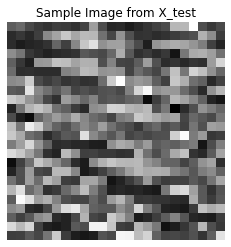

In [31]:
sample_image = X_test_prepared[6]  

sample_image = sample_image.reshape((24, 24))
plt.imshow(sample_image, cmap='gray')  
plt.title('Sample Image from X_test')
plt.axis('off')  
plt.show()